In [1]:
from qiskit import* ## importing the library that necessary for quantum computing 
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector , plot_state_qsphere ## importing visualization tools for quantum computing 
from math import pi
%matplotlib inline 

In [2]:
#Implementation of the classical 2 qubits adder
circuit = QuantumCircuit(4, 2)
circuit.x(0) #initalize input A
circuit.x(1) #initalize input B
circuit.barrier()

circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(2, 0) #measure sum
circuit.measure(3, 1) #measure carry - out

print(circuit)

     ┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 


In [3]:
#processing the quantum opperation
simulator = Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector , prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

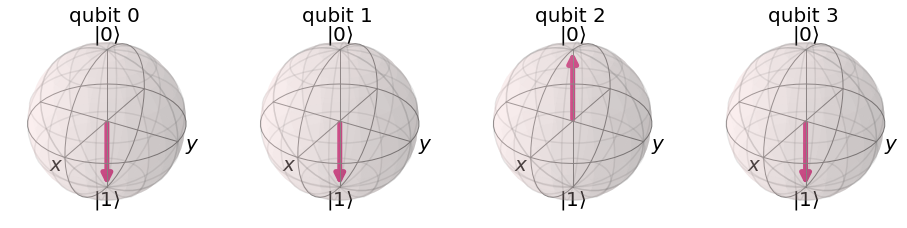

In [4]:
plot_bloch_multivector(statevector)